In [166]:
from graphviz import Digraph

In [167]:
class rtrie:
    def __init__(self,c , v = None , child = [None]*26 ): # c : caractere , v : valeur , child : liste des enfants
        self.c = c
        self.v = v
        self.children = child

In [168]:
class RTrie:
    def __init__(self):
        self.racine = [None]*26

    def TrieVide(self):
        return self.racine == None
    
    def lg(self , mot):
        return len(mot)
    
    def prem(self , mot): #retourne le caractere en int
        res = ord(mot[0])
        return res-97

    def reste(self , mot):
        return mot[1:]


    def EnfantSauf(self, A, i):
        """Retourne la liste des enfants de A sauf celui d'indice i."""
        if A is None:
            return []
        res = []
        cpt = 0
        for cpt in range(len(A.children)):
            if cpt == i:
                res.append(None)
                cpt += 1
            else:
                res.append(self.duplique(A.children[cpt]))
                cpt += 1

        return res



    def SousArbre(self, A, i):
        """Renvoie une copie du i-eme sous arbre de A"""
        # print("SOUS ARBRE ????????",A.c ," et ", A.v , " et len", len(A.children))
        if A.children[i] is None :
            # print("SOUS ARBRE - Sous arbre vide")
            return None
        return self.duplique(A.children[i])


    def R_Trie(self, i , L , A): # i : entier , L : liste , A : R-Trie
        """Renvoie le trie construit a partir de L en inserant A a la i-eme position."""
        #Pas besoin de dupliquer L car elle est deja dupliquee dans la methode EnfantSauf
        char = chr(i+97) # retourne le caractere en minuscule correspondant à l'entier
        print("RTRIE ajout de la lettre ", char)
        res = rtrie(char)
        res.children = L
        if A is not None :
            # res.children[i] = self.duplique(A)
            res.children[i] = A
        else:
            res.children[i] = None
        return res
    
        

        
    def duplique(self,A):
        if A is None :
            return None
        else:
            res = rtrie(A.c, A.v)
            res.children = [None]*26
            for i in range(len(A.children)):
                res.children[i] = self.duplique(A.children[i])
            return res




    def ajout(self, c , A , v ) : # c : cle , A : R-Trie , v : valeur
        """RTrie * str * RTrie * -> rtrie[]"""
        """Ajoute un mot dans l'arbre R-Trie."""
        p = self.prem(c)
        self.racine[p] = self._ajout(c, self.racine[p], v)
        return self.racine



    def _ajout(self, c , A , v ) : # c : cle , A : R-Trie , v : valeur
        """RTrie * str * rtrie * -> rtrie"""
        if A is None :
            A = rtrie(c)
            
        if self.lg(c) == 1 :
            print("ajout de la derniere lettre ", c[0] , " avec valeur ", v)
            # A.v = v
            # return A
            return rtrie(c,v)

        p = self.prem(c)
        print("valeur de p :",p, "pour la lettre ", c[0] , " et valeur v :", v, " et son type ", type(A.children))
        return self.R_Trie(p, self.EnfantSauf(A, p), self._ajout(self.reste(c),self.SousArbre(A,p),v))


    

    def recherche(self, mot):
        """Recherche un mot dans l'arbre R-Trie."""
        p = self.prem(mot)
        return self._recherche(mot, self.racine[p])
    

    def _recherche(self, mot, noeud):
        """Recherche un mot dans l'arbre R-Trie."""
        if noeud is None:
            return False

        if len(mot) == 1 and noeud.c == mot : # Si nous sommes à la fin du mot et il contient une valeur 
            return noeud.v is not None

        p = self.prem(mot)
        return self._recherche(self.reste(mot), noeud.children[p])




    def supprime(self, mot):
        """Supprime un mot de l'arbre R-Trie."""
        p = self.prem(mot)
        self.racine[p] = self._supprime(mot, self.racine[p])
        return self.racine
    

    def _supprime(self, mot, noeud):
        """RTrie * str *  """
        """Supprime un mot de l'arbre R-Trie."""
        res = noeud
        #ok = False
        if res is None:
            return None 
        
        if len(mot) < 1:
            return res

        p = self.prem(mot)

        if len(mot) == 1:
            if res.v is not None and mot == res.c:
                res.v = None
                #ok = True
                if self.contientNone(res.children):
                    return None
            # elif self.contientNone(res.children) :
            #     res = self.R_Trie(p, self.EnfantSauf(noeud, p), None)
            else :
                res = self.R_Trie(p, self.EnfantSauf(noeud, p), self._supprime(self.reste(mot), self.SousArbre(noeud, p)))

        elif len(mot) > 1 :
            res = self.R_Trie(p, self.EnfantSauf(noeud, p), self._supprime(self.reste(mot), self.SousArbre(noeud, p)))

        # Cas de suppression de noeud inutile
        if res.v is None and self.contientNone(res.children):
            return None

        return res



    def contientNone(self, noeud):
        """Vérifie si un noeud contient que des None"""
        for enfant in noeud:
            if enfant is not None:
                return False
        return True

    def afficher_mots(self, noeud=None, mot=''):
        """Affiche tous les mots présents dans l'arbre R-Trie."""
        if noeud is None:
            noeud = self.racine

        for i, enfant in enumerate(noeud):
            if enfant is not None:
                # Si nous sommes à la fin d'un mot, affichons le mot
                if enfant.v is not None:
                    print(mot + chr(i + 97))
                # Sinon, continuons à parcourir l'arbre
                self.afficher_mots(enfant.children, mot + chr(i + 97))




    # GPT OK ~~
    # def visualiser_arbre(self):
    #     dot = Digraph()

    #     def generer_graphique(arbre, parent_label=None):
    #         if arbre is not None:
    #             for enfant in arbre:
    #                 if enfant is not None:
    #                     print("ENFANT ", enfant.c)
    #                     enfant_label = f"{enfant.c}_{id(enfant)}"
    #                     dot.node(enfant_label, label=f"{enfant.c} {enfant.v if enfant.v is not None else ''}")
    #                     if parent_label is not None:
    #                         print("LIAISON ", enfant.c , " AVEC : ", parent_label)
    #                         dot.edge(parent_label, enfant_label)

    #                     generer_graphique(enfant.children, enfant_label)

    #     for i, enfant in enumerate(self.racine):
    #         generer_graphique([enfant], f"racine_{i}")

    #     return dot


    def visualiser_arbre(self):
        dot = Digraph()

        def generer_graphique(arbre, parent_label=''):
            if arbre is not None:
                for enfant in arbre:
                    if enfant is not None:
                        print("ENFANT ", enfant.c)
                        enfant_label = f"{enfant.c}_{id(enfant)}"
                        dot.node(enfant_label, label=f"{enfant.c} {enfant.v if enfant.v is not None else ''}")
                        if parent_label is not None:
                            print("LIAISON ", enfant.c , " AVEC : ", parent_label)
                            dot.edge(parent_label, enfant_label) # , label=f"{enfant.c}"

                        generer_graphique(enfant.children, enfant_label)

        # Noeud racine
        dot.node("racine", label="")

        for enfant in self.racine:
            if enfant is not None:
               generer_graphique([enfant], "racine")

        return dot




    # def visualiser_arbre(self):
    #     dot = Digraph()

    #     def generer_graphique(arbre, parent_label=''):
    #         if arbre is not None:
    #             for enfant in arbre:
    #                 if enfant is not None:
    #                     noeud_label = f"{parent_label}{enfant.c}" if parent_label else enfant.c
    #                    #dot.node(noeud_label, label=f"{''}")
    #                     dot.node(noeud_label, label=f"{enfant.c} {enfant.v if enfant.v is not None else ''}")
    #                     if parent_label:
    #                         dot.edge(parent_label, noeud_label) #, label=f"{enfant.c}"
    #                     generer_graphique(enfant.children, noeud_label)

    #     # Noeud racine
    #     dot.node("racine", label="")

    #     for enfant in self.racine:
    #         if enfant is not None:
    #            generer_graphique([enfant], "racine")

    #     return dot



    # def visualiser_arbre(self):
    #     dot = Digraph()

    #     def generer_graphique(arbre, parent_label=''):
    #         if arbre is not None:
    #             for enfant in arbre:
    #                 if enfant is not None:
    #                     noeud_label = f"{parent_label}{enfant.c}" if parent_label else enfant.c
    #                     dot.node(noeud_label, label=f"{enfant.c} {enfant.v if enfant.v is not None else ''}")
    #                     if parent_label:
    #                         dot.edge(parent_label, noeud_label)
    #                     generer_graphique(enfant.children, noeud_label)

    #     generer_graphique(self.racine)
    #     return dot


valeur de p : 1 pour la lettre  b  et valeur v : 1  et son type  <class 'list'>
valeur de p : 14 pour la lettre  o  et valeur v : 1  et son type  <class 'list'>
valeur de p : 13 pour la lettre  n  et valeur v : 1  et son type  <class 'list'>
valeur de p : 9 pour la lettre  j  et valeur v : 1  et son type  <class 'list'>
valeur de p : 14 pour la lettre  o  et valeur v : 1  et son type  <class 'list'>
valeur de p : 20 pour la lettre  u  et valeur v : 1  et son type  <class 'list'>
ajout de la derniere lettre  r  avec valeur  1
RTRIE ajout de la lettre  u
RTRIE ajout de la lettre  o
RTRIE ajout de la lettre  j
RTRIE ajout de la lettre  n
RTRIE ajout de la lettre  o
RTRIE ajout de la lettre  b
valeur de p : 0 pour la lettre  a  et valeur v : 2  et son type  <class 'list'>
valeur de p : 3 pour la lettre  d  et valeur v : 2  et son type  <class 'list'>
valeur de p : 8 pour la lettre  i  et valeur v : 2  et son type  <class 'list'>
valeur de p : 14 pour la lettre  o  et valeur v : 2  et son t

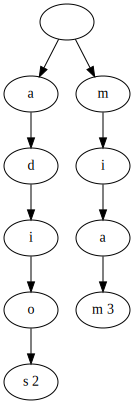

In [169]:
rtrie1 = RTrie()
rtrie1.ajout("bonjour", rtrie1.racine, 1)
rtrie1.ajout("adios", rtrie1.racine, 2)
rtrie1.ajout("miam", rtrie1.racine, 3)
rtrie1.ajout("bonjours", rtrie1.racine, 4)

# print("PRESENCE du mot bonjour : ", rtrie1.recherche("bonjour"))
# rtrie1.racine = rtrie1.supprime("bonjour")
# print("PRESENCE du mot bonjour : ", rtrie1.recherche("bonjour"))

#rtrie1.racine = rtrie1.supprime("bonjours")

rtrie1.visualiser_arbre()

valeur de p : 1 pour la lettre  b  et valeur v : 1  et son type  <class 'list'>
valeur de p : 14 pour la lettre  o  et valeur v : 1  et son type  <class 'list'>
valeur de p : 13 pour la lettre  n  et valeur v : 1  et son type  <class 'list'>
valeur de p : 9 pour la lettre  j  et valeur v : 1  et son type  <class 'list'>
valeur de p : 14 pour la lettre  o  et valeur v : 1  et son type  <class 'list'>
valeur de p : 20 pour la lettre  u  et valeur v : 1  et son type  <class 'list'>
ajout de la derniere lettre  r  avec valeur  1
RTRIE ajout de la lettre  u
RTRIE ajout de la lettre  o
RTRIE ajout de la lettre  j
RTRIE ajout de la lettre  n
RTRIE ajout de la lettre  o
RTRIE ajout de la lettre  b
valeur de p : 1 pour la lettre  b  et valeur v : 2  et son type  <class 'list'>
valeur de p : 14 pour la lettre  o  et valeur v : 2  et son type  <class 'list'>
valeur de p : 13 pour la lettre  n  et valeur v : 2  et son type  <class 'list'>
valeur de p : 18 pour la lettre  s  et valeur v : 2  et son

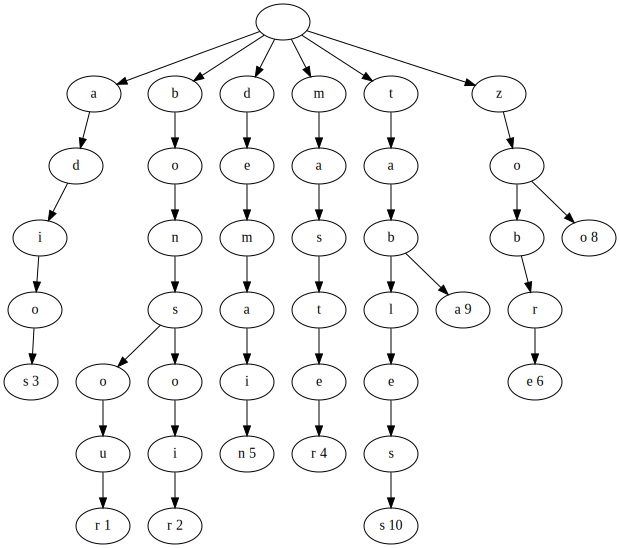

In [170]:
rt = RTrie()
rt.racine = rt.ajout("bonjour", rt.racine , 1)

rt.racine = rt.ajout("bonsoir", rt.racine , 2)

rt.racine = rt.ajout("adios", rt.racine , 3)

rt.racine = rt.ajout("master", rt.racine , 4)

rt.racine = rt.ajout("demain", rt.racine , 5)

rt.racine = rt.ajout("zebre", rt.racine , 6) # PRB JSP PQ

rt.racine = rt.ajout("zoo", rt.racine , 8)

rt.racine = rt.ajout("table", rt.racine , 7)

rt.racine = rt.ajout("tata", rt.racine , 9)

rt.racine = rt.ajout("tabless", rt.racine , 10)

print("-------------------")

rt.afficher_mots()

print("-------------------")

print("PRESENCE DU MOT bonjour : ",rt.recherche("bonjour"))

print("PRESENCE DU MOT bonjours : ",rt.recherche("bonjours"))

print("PRESENCE DU MOT bonsoir : ",rt.recherche("bonsoir"))

print("PRESENCE DU MOT zebre : ",rt.recherche("zebre"))

print("-------------------")

rt.visualiser_arbre()

print("---------SUPPRIME----------")

rt.racine = rt.supprime("adio")

rt.afficher_mots()

rt.visualiser_arbre()